# ECE 685D, Fall 2020 
## Problem Set 3

## Full name: Vinayak Gupta


### Problem 3: Binary Classification with Generalized Linear Models

In [1]:
# import packages 
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# """ data preparation """

# read csv file 
df = pd.read_csv('breast_cancer.csv')  # df denotes a data frame 

# # extract the 'diagnosis' column as your targets 
targets = df['diagnosis']
# convert the entries of targets to 0/1
mapping = {'M': 0, 'B': 1}
targets=targets.replace(mapping)

# the output is a new targets array containing only 0 and 1 
  
    
# extract your features data
data = torch.FloatTensor(df.iloc[:,2:].values)

# # train/test split 

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=40)


#### Problem 3.1
* #### __Important :__  You are not allowed to use built-in LDA functions from the sklearn package. 

In [3]:
# enter your solution to problem 3.1 here
X_train_0=X_train[y_train.values==0]
X_train_1=X_train[y_train.values==1]

mu_0 = X_train_0.mean(axis=0)
mu_1 = X_train_1.mean(axis=0)

pi_1 = y_train.values.mean()
pi_0 = 1-pi_1

sigma = (torch.mm((X_train_0 - mu_0).T, X_train_0 - mu_0) + torch.mm((X_train_1 - mu_1).T, X_train_1 - mu_1))/len(X_train)
sigma_inv = torch.inverse(sigma)

In [4]:
w = torch.mm(sigma_inv, (mu_1-mu_0).view(12,1))
w_1 =np.log(pi_1/pi_0) -0.5* torch.mm(mu_1.view(1,12),torch.mm(sigma_inv, mu_1.view(12,1))) + 0.5* torch.mm(mu_0.view(1,12),torch.mm(sigma_inv, mu_0.view(12,1)))

In [5]:
y_pred_train = torch.matmul(X_train,w)+w_1
y_pred_train= (y_pred_train>0).type(torch.uint8)
y_train=torch.LongTensor(y_train.values)
Y_check =y_train.view(len(X_train),1)
correct = (y_pred_train== Y_check).type(torch.uint8) 

print("Classification accuracy on training data: " , torch.sum(correct).item() *100/ len(correct))

pred_test = torch.matmul(X_test,w)+w_1
pred_test= (pred_test>0).type(torch.uint8)
y_test=torch.LongTensor(y_test.values)
Y_check_test =y_test.view(len(X_test),1)
correct = (pred_test== Y_check_test).type(torch.uint8)

print("Classification accuracy on test data: " , torch.sum(correct).item() *100/ len(correct))

Classification accuracy on training data:  92.46231155778895
Classification accuracy on test data:  95.32163742690058


#### Problem 3.2

In [6]:
# enter your solution to problem 3.2 here
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward( self, x):
        outputs = self.linear(x)
        return outputs

In [7]:
norm_mean = X_train.mean(axis=0)
norm_std = X_train.std(axis=0)

X_train = (X_train-norm_mean)/norm_std
X_test = (X_test - norm_mean)/norm_std

In [8]:
model = LogisticRegression(12,2)
criterion =  nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
epoch_size = 200

In [9]:
loss_train=[]
loss_test=[]
accuracy_train=[]
accuracy_test=[]
model.train()
for epoch in range(epoch_size): 
    
    optimizer.zero_grad()    # Forward pass
    y_pred_train = model(X_train)    # Compute Loss
    loss = criterion(y_pred_train.squeeze(), y_train)
    loss_train.append(loss.item())
    correct = (y_pred_train.argmax(1) == y_train)
    accuracy_train.append(torch.sum(correct).item() *100/ len(correct))
    #print('Test loss after Training' , after_train.item())
    #print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass
    
    model.eval()
    y_pred_test = model(X_test)
    after_train = criterion(y_pred_test.squeeze(), y_test) 
    loss_test.append(after_train.item())
    correct = (y_pred_test.argmax(1) == y_test)
    accuracy_test.append(torch.sum(correct).item()*100 / len(correct))
    model.train()
    loss.backward()
    optimizer.step()

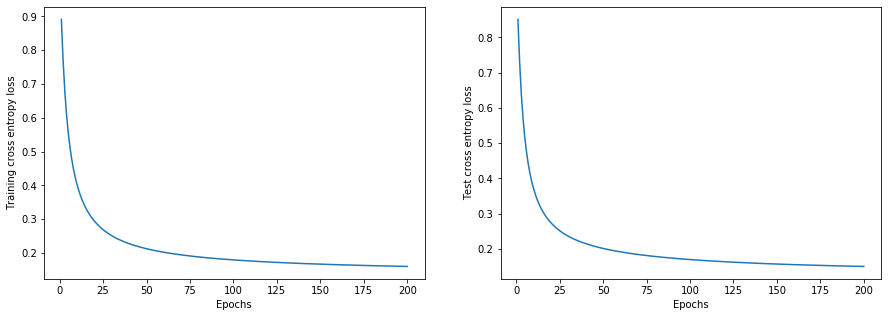

In [10]:
# Plot for cross entropy
epochs=[i for i in range(1,epoch_size+1)]
fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax1.plot(epochs,loss_train)
ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Training cross entropy loss', fontsize=10)
ax2= fig.add_subplot(122)
ax2.plot(epochs,loss_test)
ax2.set_xlabel('Epochs', fontsize=10)
ax2.set_ylabel('Test cross entropy loss', fontsize=10)
plt.show()

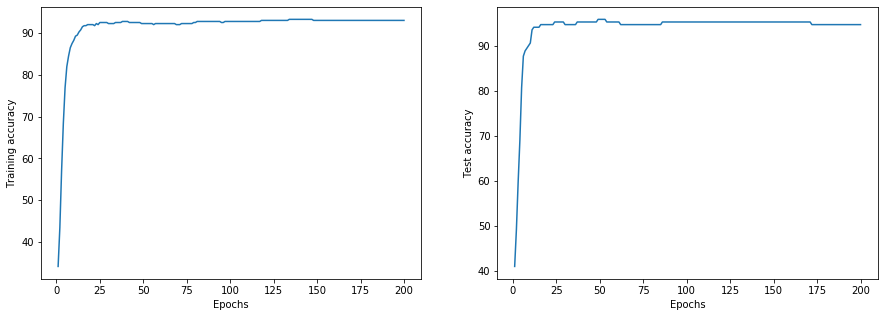

In [11]:
# Plot for accuracy
fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax1.plot(epochs,accuracy_train)
ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Training accuracy', fontsize=10)
ax2= fig.add_subplot(122)
ax2.plot(epochs,accuracy_test)
ax2.set_xlabel('Epochs', fontsize=10)
ax2.set_ylabel('Test accuracy', fontsize=10)
plt.show()

In [12]:
print("Classification accuracy on training data: " , accuracy_train[-1])
print("Classification accuracy on test data: " , accuracy_test[-1])

Classification accuracy on training data:  92.96482412060301
Classification accuracy on test data:  94.73684210526316


### Problem 4: Binary Classification with Neural Networks

#### Problem 4.2

In [61]:
# enter your solution to problem 4.2 here
N=2
M=16
df=pd.read_csv('breast_cancer.csv')

In [62]:
#Pre process Data
targets = df['diagnosis']
mapping = {'M': 0, 'B': 1}
targets=targets.replace(mapping)
data = torch.FloatTensor(df.iloc[:,2:].values)
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=40)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [63]:
norm_mean = X_train.mean(axis=0)
norm_std = X_train.std(axis=0)

X_train = (X_train-norm_mean)/norm_std
X_test = (X_test - norm_mean)/norm_std

**4.2 A**

In [16]:
# Initialize a NN for 4.2 a
input_size = 12
hidden_sizes = [M, M]
output_size = 2# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

In [17]:
# Train and evaluate
epoch_size = 1000
loss_train=[]
loss_test=[]
accuracy_train=[]
accuracy_test=[]
model.train()
for epoch in range(epoch_size): 
    
    optimizer.zero_grad()    # Forward pass
    y_pred_train = model(X_train)    # Compute Loss
    loss = criterion(y_pred_train.squeeze(), y_train)
    loss_train.append(loss.item())
    correct = (y_pred_train.argmax(1) == y_train)
    accuracy_train.append(torch.sum(correct).item() *100/ len(correct))
    #print('Test loss after Training' , after_train.item())
    #print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass
    
    model.eval()
    y_pred_test = model(X_test)
    after_train = criterion(y_pred_test.squeeze(), y_test) 
    loss_test.append(after_train.item())
    correct = (y_pred_test.argmax(1) == y_test)
    accuracy_test.append(torch.sum(correct).item()*100 / len(correct))
    model.train()
    loss.backward()
    optimizer.step()

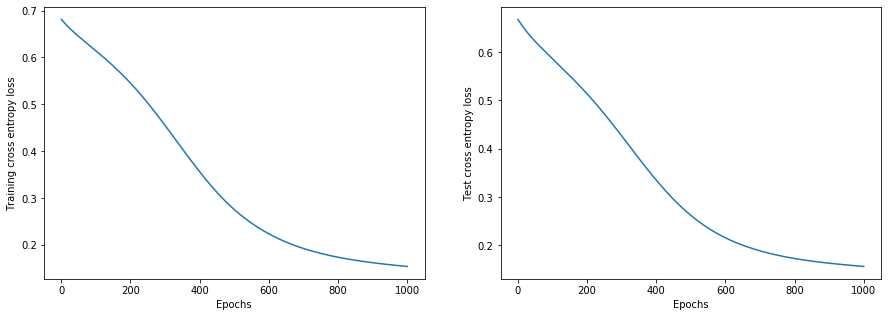

In [18]:
# Plot for cross entropy
epochs=[i for i in range(1,epoch_size+1)]
fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax1.plot(epochs,loss_train)
ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Training cross entropy loss', fontsize=10)
ax2= fig.add_subplot(122)
ax2.plot(epochs,loss_test)
ax2.set_xlabel('Epochs', fontsize=10)
ax2.set_ylabel('Test cross entropy loss', fontsize=10)
plt.show()

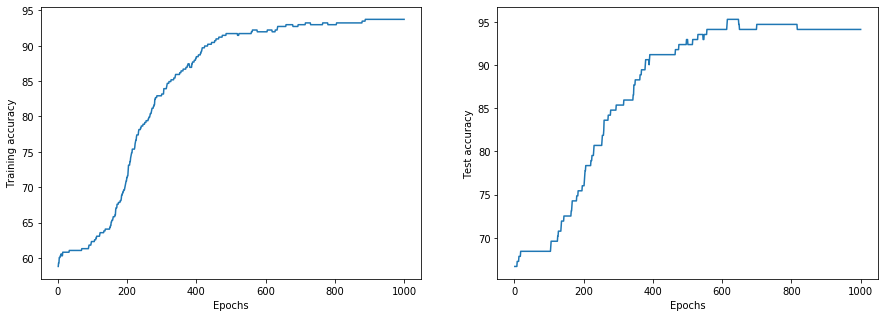

In [19]:
# Plot for accuracy
fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax1.plot(epochs,accuracy_train)
ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Training accuracy', fontsize=10)
ax2= fig.add_subplot(122)
ax2.plot(epochs,accuracy_test)
ax2.set_xlabel('Epochs', fontsize=10)
ax2.set_ylabel('Test accuracy', fontsize=10)
plt.show()

In [20]:
print("Classification accuracy on training data: " , accuracy_train[-1])
print("Classification accuracy on test data: " , accuracy_test[-1])

Classification accuracy on training data:  93.71859296482413
Classification accuracy on test data:  94.15204678362574


**4.2 B**

In [21]:
# Initialzie for 4.2 b
N=[i for i in range(1,9)]*7
M=[]
for j in range(1,8):
    val= 2**j
    for i in range(1,9):
        M.append(val)

accuracy_test =[]
frob_norm=[]

In [22]:
# Define a class for variable number of hidden layers in NN
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_layers, layer_size, output_size):
            super(Feedforward, self).__init__()
            self.layers = nn.ModuleList()
            self.layers.append(nn.Linear(input_size, layer_size))   
            for i in range(1, hidden_layers):
                self.layers.append(nn.Linear(layer_size, layer_size))
           
            self.out= nn.Linear(layer_size, output_size)
        
            
            
        def forward(self, x):
            for layer in self.layers:
                x = F.relu(layer(x))
            output= F.log_softmax(self.out(x), dim=1)

            return output

In [23]:
# Train and evaluate

for idxn,n in enumerate(N):
    
    model = Feedforward(12, n,M[idxn],2)
    criterion = nn.NLLLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
    epoch_size = 400
    model.train()
    for epoch in range(epoch_size): 

        optimizer.zero_grad()    # Forward pass
        y_pred_train = model(X_train)    # Compute Loss
        loss = criterion(y_pred_train.squeeze(), y_train)
        #accuracy_train.append(torch.sum(correct).item() *100/ len(correct))
        #print('Test loss after Training' , after_train.item())
        #print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass
        loss.backward()
        optimizer.step()
    model.eval()
    y_pred_test = model(X_test)
    correct = (y_pred_test.argmax(1) == y_test)
    accuracy_test.append(torch.sum(correct).item()*100 / len(correct))
    frob_norm.append(np.linalg.norm(model.layers[0].weight.grad.numpy(),ord='fro'))
        

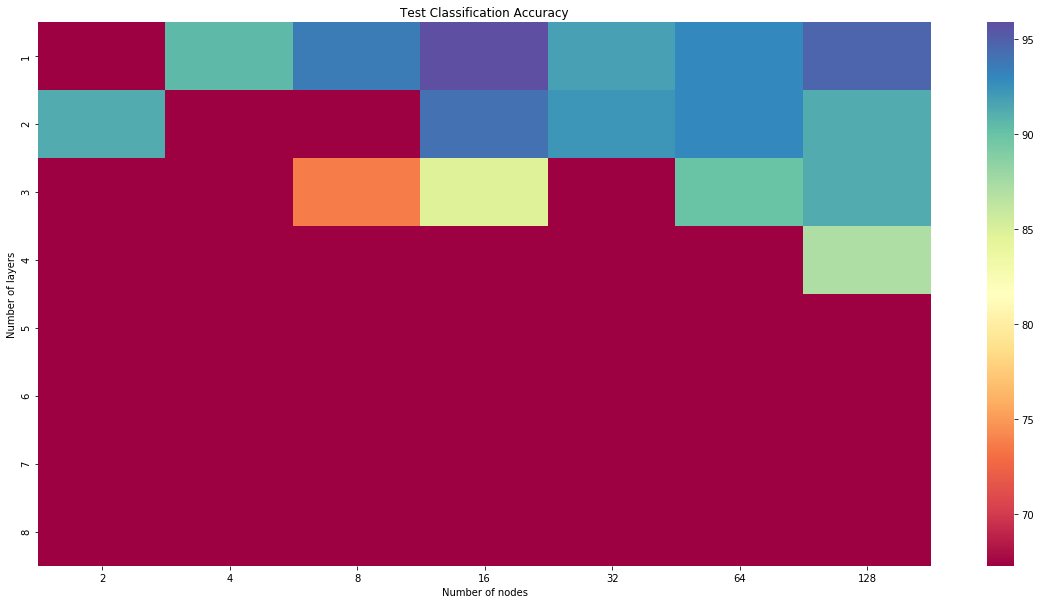

In [24]:
fig= plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
accuracyplot = pd.DataFrame({'Number of layers': N, 'Number of nodes': M, 'Accuracy': accuracy_test})
accuracyplot_pivoted = accuracyplot.pivot("Number of layers", "Number of nodes", "Accuracy")
ax = sns.heatmap(accuracyplot_pivoted,cmap = "Spectral")
plt.title("Test Classification Accuracy")
plt.show()


**As the number of layer increases the accuracy starts decreasing.**

**As the number of nodes in the hidden layer increase, the accuracy increases somewhat**

**It can also be seen with higher number of nodes in layer, it takes more amount of layers to have reduction in accuracy**

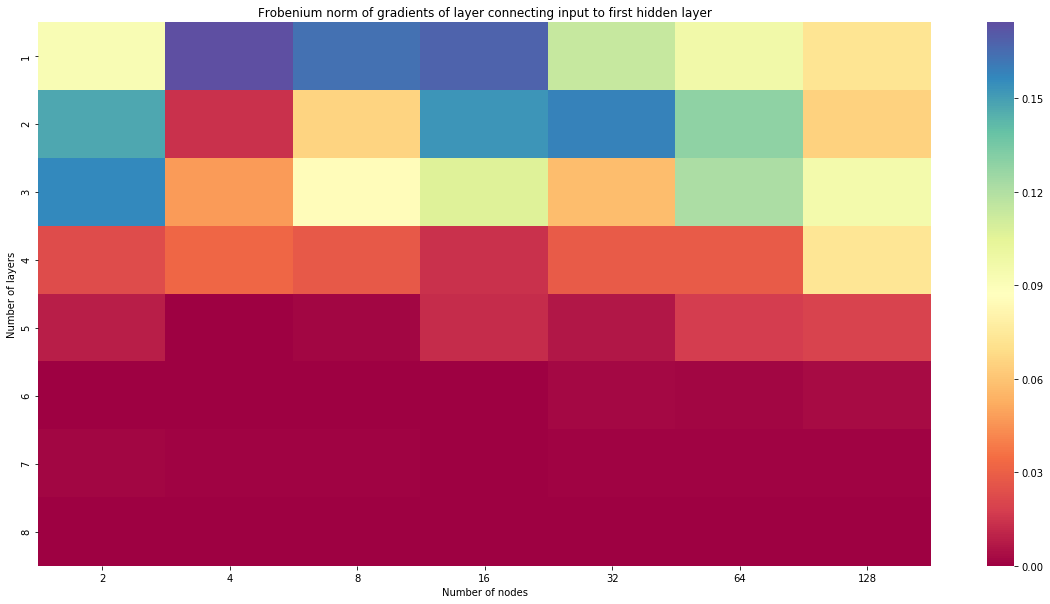

In [25]:
fig= plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
accuracyplot = pd.DataFrame({'Number of layers': N, 'Number of nodes': M, 'Frobenius Norm': frob_norm})
accuracyplot_pivoted = accuracyplot.pivot("Number of layers", "Number of nodes", "Frobenius Norm")
ax = sns.heatmap(accuracyplot_pivoted,cmap = "Spectral")
plt.title("Frobenium norm of gradients of layer connecting input to first hidden layer")
plt.show()

**It is definitely the case that no matter how many nodes in hidden layer we use, as the number of layers increase, the magnitude of gradient w.r.t weights connecting the input layer to first hidden layer decreases.**

**As the number of nodes in hidden layer increases (keeping N low and constant), we see that the magnitude of gradient also decreases though it varies a bit and trend is not strong)**

**The magnitude of gradient with higher number of nodes decreases more slowly as compared to those with fewer number of nodes**

#### Problem 4.3
* #### __Important :__  Here, you are not allowed to use the Optim package. 

In [26]:
def sigmoid_activation(z):
    cache = z
    #print("SIGMOID",cache)
    return 1/(1+torch.exp(-z)), cache

In [27]:
def sigmoid_diff(Z):
    s = 1/(1+torch.exp(-Z))
    dZ =  s * (1-s)
    return dZ

In [28]:
def relu_activation(z):
#    print(z.shape)
    cache=z
    z=torch.FloatTensor([[max(0,z[i][j]) for j in range(len(z[0]))] for i in range(len(z))])
  #  print("RELU",cache)
    return z,cache

In [58]:
def initialize_parameters_deep(layer_dims):   
    parameters = {}
    L = len(layer_dims)            
   
    for l in range(1, L):
       
        parameters['W' + str(l)] = torch.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = torch.zeros((layer_dims[l], 1))

    return parameters

In [30]:
def linear_forward(A, W, b):
#     print(A.shape)
#     print(W.shape)
#     print(b.shape)
#    print(torch.matmul(W,A))
#     print(A.type())
#     print(W.type())
    Z = torch.matmul(W,A)+b
#    print(Z)
    cache = (A, W, b)
  #  print("Linear",cache)
    return Z, cache

In [31]:
def linear_activation_forward(A_prev, W, b,L):
   
    Z, linear_cache = linear_forward(A_prev, W, b)
   
    if(L==3):
       # print(Z)
        A, activation_cache = sigmoid_activation(Z)
    else:
        A, activation_cache = relu_activation(Z)
   
    cache = (linear_cache, activation_cache)
   
    return A, cache

In [32]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                
    
    #print(L)
    for l in range(1, L+1):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)] , parameters['b' + str(l)],l)
       # print("LAYER",l)
        #print(cache)
        caches.append(cache)

            
    return A,caches

In [33]:
def compute_cost(A,Y):
    m=Y.shape[1]
#     print(m)
#     print(A)
#     print(Y)
    cost=-(1/m)*(np.dot(Y,torch.log(A).numpy().T)+np.dot(1-Y,torch.log(1-A).numpy().T))
    cost=np.squeeze(cost)
    return torch.FloatTensor(cost)

In [34]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m=A_prev.shape[1]
#     print(dZ.shape)
#     print(dZ.type())
#     print(A_prev.T.shape)
#     print(A_prev.T.type())
    dW = (1/m)*(torch.mm(dZ,A_prev.T))
    db = (1/m)*(torch.mm(dZ,torch.ones((dZ.shape[1],1))))
    dA_prev =torch.mm(W.T,dZ)

    return dA_prev, dW, db

In [35]:
def sigmoid_activation_backward(dA, cache):
    
    linear_cache, activation_cache = cache


    dZ = dA*sigmoid_diff(activation_cache)
#     print(sigmoid_diff(activation_cache).type())
#     print(dA.type())
#     print(dZ.type())
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
     
    return dA_prev, dW, db


In [36]:
def relu_diff(Z):
    Z =[[0 if Z[i][j]==0 else 1 for j in range(len(Z[0]))] for i in range(len(Z))]
    return torch.FloatTensor(Z)

In [37]:
def linear_activation_backward(dA, cache):
    
    linear_cache, activation_cache = cache


    dZ = dA*relu_diff(activation_cache)
#     print(sigmoid_diff(activation_cache).type())
#     print(dA.type())
#     print(dZ.type())
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
     
    return dA_prev, dW, db


In [38]:
def L_model_backward(AL, Y, caches):
   
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = torch.FloatTensor(Y.reshape(AL.shape))
    # after this line, Y is the same shape as AL
   # print(AL)
    dAL = torch.FloatTensor(- (Y/AL) + (1 - Y)/ (1 - AL))
   # print(dAL)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = sigmoid_activation_backward(dAL, current_cache)   
#     print(grads['dA2'].shape)
#     print(grads['dW3'].shape)
#     print(grads['db3'].shape)
    for l in reversed(range(L-1)):

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [39]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate*grads["dW" + str(l + 1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate*grads["db" + str(l + 1)])

    return parameters

In [40]:
def predict(X, y, parameters):

    
    m = X.shape[1]
    n = len(parameters) 
    p = np.zeros((1,m))
    
 
    probas, caches = L_model_forward(X, parameters)

 
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
 
    #print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return np.sum((p == y)/m)

In [41]:
def L_layer_model(X_train, Y_train,X_test,Y_test, layers_dims,learning_rate = 1 ,num_iterations=100):
    

    costs_train = []
    accuracy_train=[]
    accuracy_test=[]
    costs_test=[]
    parameters = initialize_parameters_deep(layers_dims)
    

    for i in range(0, num_iterations):
  
     
        AL, caches = L_model_forward(X_train, parameters)
 

        cost = compute_cost(AL, Y_train)
        costs_train.append(cost)
        #print(cost)
        accuracy_train.append(predict(X_train,Y_train,parameters))
        accuracy_test.append(predict(X_test,Y_test,parameters))
        a_test,temp= L_model_forward(X_test, parameters)
        cost = compute_cost(a_test, Y_test)
        costs_test.append(cost)
#         print(AL)
#         print(Y)
        
        grads = L_model_backward(AL, Y_train, caches)

        #print(grads)
        parameters = update_parameters(parameters, grads, learning_rate)
        

    return parameters,costs_train,accuracy_train,accuracy_test,costs_test

In [64]:
layers_dims = [12]
d=2
for j in range(d):
    layers_dims.append(16)
layers_dims.append(1)

In [65]:
y_train_cus=np.array([[i] for i in y_train])
y_test_cus=np.array([[i] for i in y_test])

In [66]:
parameters,costs,accuracy_train,accuracy_test,costs_test=L_layer_model(X_train.T, y_train_cus.T,X_test.T,y_test_cus.T , layers_dims)

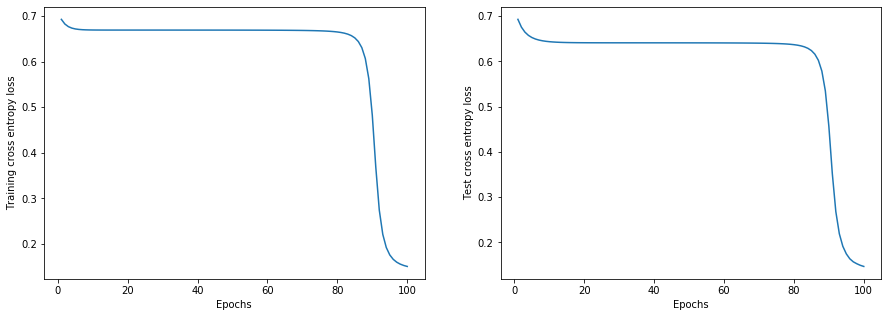

In [67]:
epochs=[i for i in range(1,101)]
fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax1.plot(epochs,costs)
ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Training cross entropy loss', fontsize=10)
ax2= fig.add_subplot(122)
ax2.plot(epochs,costs_test)
ax2.set_xlabel('Epochs', fontsize=10)
ax2.set_ylabel('Test cross entropy loss', fontsize=10)
plt.show()

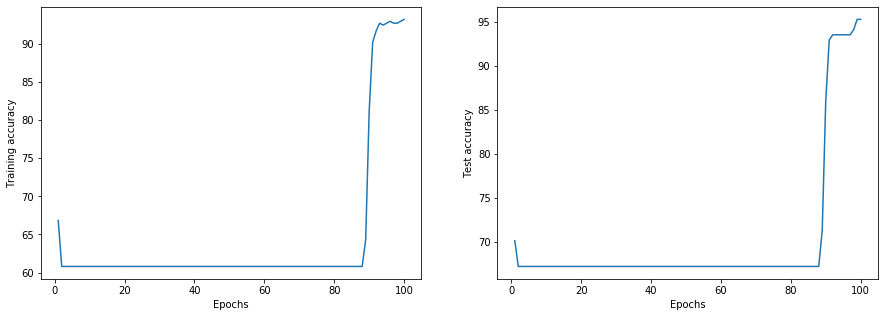

In [68]:
fig= plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax1= fig.add_subplot(121)
ax1.plot(epochs,np.array(accuracy_train)*100)
ax1.set_xlabel('Epochs', fontsize=10)
ax1.set_ylabel('Training accuracy', fontsize=10)
ax2= fig.add_subplot(122)
ax2.plot(epochs,np.array(accuracy_test)*100)
ax2.set_xlabel('Epochs', fontsize=10)
ax2.set_ylabel('Test accuracy', fontsize=10)
plt.show()

In [69]:
print("Classification accuracy on training data: " , accuracy_train[-1]*100)
print("Classification accuracy on test data: " , accuracy_test[-1]*100)

Classification accuracy on training data:  93.21608040201006
Classification accuracy on test data:  95.32163742690058


**I am using gradient descent instead of stochastic gradient descent so the convergence is slower. To speed up, I am using a higher learning rate of 1 with 100 iterations**

### Problem 5: First order optimization methods

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms



# Download and prepare the MNIST data set 
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]))


"""
The data features can be extracted as train_dataset/test_dataset.data
The labels can be extracted as train_dataset/test_dataset.targets 
Note that the data are 28x28 images which you will have to transform to vectors.  
"""


# enter your solution here

'\nThe data features can be extracted as train_dataset/test_dataset.data\nThe labels can be extracted as train_dataset/test_dataset.targets \nNote that the data are 28x28 images which you will have to transform to vectors.  \n'

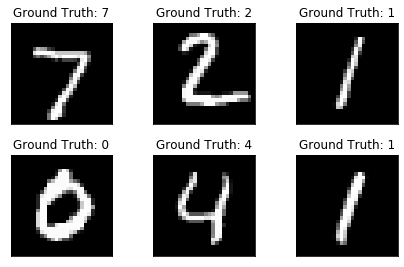

In [3]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(test_dataset[i][0].squeeze(), cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(test_dataset[i][1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=60000, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=10000, shuffle=True)

dataiter = iter(trainloader)
X_train, y_train = dataiter.next()
X_train=X_train.view(60000,784)

dataiter = iter(testloader)
X_test, y_test = dataiter.next()
X_test=X_test.view(10000,784)

In [21]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size,bias=True)

    def forward( self, x):
        outputs = self.linear(x)
        return outputs

**5.1 Momentum Method with parameter $\beta = 0.9$**

In [58]:
eta = 0.001
batches =[1,500,60000]
lambda_val = [0.01,.1,1]
beta=0.9
epochs = [2,100,100]

In [36]:
for idx,batch in enumerate(batches):
    for lam in lambda_val:
        model = LogisticRegression(784,10)
        criterion =  nn.CrossEntropyLoss()
        epoch_size = epochs[idx]
        Mw = torch.zeros((10,784))
        Mb = torch.zeros(10)
        for epoch in range(epoch_size):
            shuffle = torch.randperm(60000)
            for i in range(0,60000, batch):
                val=shuffle[i:i+batch]
                curr_x =  X_train[val]
                curr_y = y_train[val]
               # print(curr_y.shape)
                
                curr_y_pred = model(curr_x)
               # print(curr_y_pred.shape)
                w = list(model.parameters())[0]
                b = list(model.parameters())[1]
                loss = criterion(curr_y_pred, curr_y) + lam*(torch.norm(w) + torch.norm(b))
                if w.grad is not None:
                    w.grad.zero_()
                if b.grad is not None:
                    b.grad.zero_()
                loss.backward()
                with torch.no_grad(): 
                    Mw = beta*Mw + w.grad
                    Mb = beta*Mb + b.grad
                    w -=  eta * Mw
                    b -=  eta * Mb
                                    
                model.linear.weight.data = w.clone()
                model.linear.bias.data = b.clone()
                
                
        y_pred_test = model(X_test)  
        correct = (y_pred_test.argmax(1) == y_test)
        print("Batch Size: " + str(batch) + " ; " +"Lambda: " + str(lam)+ " ; " + "Accuracy on test: " + str(torch.sum(correct).item()*100 / len(correct)))

Batch Size: 1 ; Lambda: 0.01 ; Accuracy on test: 85.5
Batch Size: 1 ; Lambda: 0.1 ; Accuracy on test: 77.34
Batch Size: 1 ; Lambda: 1 ; Accuracy on test: 36.13
Batch Size: 500 ; Lambda: 0.01 ; Accuracy on test: 92.2
Batch Size: 500 ; Lambda: 0.1 ; Accuracy on test: 91.31
Batch Size: 500 ; Lambda: 1 ; Accuracy on test: 86.67
Batch Size: 60000 ; Lambda: 0.01 ; Accuracy on test: 86.4
Batch Size: 60000 ; Lambda: 0.1 ; Accuracy on test: 86.04
Batch Size: 60000 ; Lambda: 1 ; Accuracy on test: 86.1


**5.2 Nesterov’s accelerated gradient (NAG) method with parameter $\beta = 0.95$**

In [48]:
beta=0.95

In [49]:
def calculatelambda_val(val):
    return (1 + (1+ 4 * val*val)**0.5)/2

In [50]:
for idx,batch in enumerate(batches):
    for lam in lambda_val:
        model = LogisticRegression(784,10)
        criterion =  nn.CrossEntropyLoss()
        epoch_size = epochs[idx]
        t_w = torch.zeros((10,784))
        t_b = torch.zeros(10)
        lambda_prev =0
        for epoch in range(epoch_size):
            shuffle = torch.randperm(60000)
            lambda_curr = calculatelambda_val(lambda_prev)
            gamma = (1- lambda_curr)/calculatelambda_val(lambda_curr)
            lambda_prev=lambda_curr
            for i in range(0,60000, batch):
                val=shuffle[i:i+batch]
                curr_x =  X_train[val]
                curr_y = y_train[val]
               # print(curr_y.shape)
                
                curr_y_pred = model(curr_x)
               # print(curr_y_pred.shape)
                w = list(model.parameters())[0]
                b = list(model.parameters())[1]
                loss = criterion(curr_y_pred, curr_y) + lam*(torch.norm(w) + torch.norm(b))
                if w.grad is not None:
                    w.grad.zero_()
                if b.grad is not None:
                    b.grad.zero_()
                loss.backward()
                with torch.no_grad():
                    t_prev_w =t_w
                    t_prev_b =t_b
                    t_w = w - (1/beta)*w.grad
                    t_b = b - (1/beta)*b.grad
                    w = (1 - gamma)*t_w + gamma*t_prev_w
                    b = (1 - gamma)*t_b + gamma*t_prev_b
                    
                model.linear.weight.data = w.clone()
                model.linear.bias.data = b.clone()
                
                
        y_pred_test = model(X_test)  
        correct = (y_pred_test.argmax(1) == y_test)
        print("Batch Size: " + str(batch) + " ; " +"Lambda: " + str(lam)+ " ; " + "Accuracy on test: " + str(torch.sum(correct).item()*100 / len(correct)))             

Batch Size: 1 ; Lambda: 0.01 ; Accuracy on test: 89.44
Batch Size: 1 ; Lambda: 0.1 ; Accuracy on test: 83.04
Batch Size: 1 ; Lambda: 1 ; Accuracy on test: 57.15
Batch Size: 500 ; Lambda: 0.01 ; Accuracy on test: 87.09
Batch Size: 500 ; Lambda: 0.1 ; Accuracy on test: 83.85
Batch Size: 500 ; Lambda: 1 ; Accuracy on test: 30.02
Batch Size: 60000 ; Lambda: 0.01 ; Accuracy on test: 89.85
Batch Size: 60000 ; Lambda: 0.1 ; Accuracy on test: 88.01
Batch Size: 60000 ; Lambda: 1 ; Accuracy on test: 36.65


**5.3  RMSprop with parameters $\beta = 0.9, \gamma = 1$ and $\epsilon = 10^{-8}$**

In [59]:
beta = 0.9
gamma = 1
eps= 10**(-8)

In [52]:
for idx,batch in enumerate(batches):
    for lam in lambda_val:
        model = LogisticRegression(784,10)
        criterion =  nn.CrossEntropyLoss()
        epoch_size = epochs[idx]
        v_w = torch.zeros((10,784))
        v_b = torch.zeros(10)
        for epoch in range(epoch_size):
            shuffle = torch.randperm(60000)
            for i in range(0,60000, batch):
                val=shuffle[i:i+batch]
                curr_x =  X_train[val]
                curr_y = y_train[val]
               # print(curr_y.shape)
                
                curr_y_pred = model(curr_x)
               # print(curr_y_pred.shape)
                w = list(model.parameters())[0]
                b = list(model.parameters())[1]
                loss = criterion(curr_y_pred, curr_y) + lam*(torch.norm(w) + torch.norm(b))
                if w.grad is not None:
                    w.grad.zero_()
                if b.grad is not None:
                    b.grad.zero_()
                loss.backward()
                with torch.no_grad(): 
                    v_w = (1-beta)*v_w + beta*(w.grad**2)
                    v_b = (1-beta)*v_b + beta*(b.grad**2)
                    precond_w = gamma/ (eps + v_w**0.5)
                    precond_b = gamma/ (eps + v_b**0.5)
                    w-= eta *precond_w* w.grad
                    b-= eta *precond_b* b.grad 
                    
                model.linear.weight.data = w.clone()
                model.linear.bias.data = b.clone()
                
                
        y_pred_test = model(X_test)  
        correct = (y_pred_test.argmax(1) == y_test)
        print("Batch Size: " + str(batch) + " ; " +"Lambda: " + str(lam)+ " ; " + "Accuracy on test: " + str(torch.sum(correct).item()*100 / len(correct)))

Batch Size: 1 ; Lambda: 0.01 ; Accuracy on test: 85.37
Batch Size: 1 ; Lambda: 0.1 ; Accuracy on test: 81.98
Batch Size: 1 ; Lambda: 1 ; Accuracy on test: 66.17
Batch Size: 500 ; Lambda: 0.01 ; Accuracy on test: 92.42
Batch Size: 500 ; Lambda: 0.1 ; Accuracy on test: 91.03
Batch Size: 500 ; Lambda: 1 ; Accuracy on test: 86.42
Batch Size: 60000 ; Lambda: 0.01 ; Accuracy on test: 90.99
Batch Size: 60000 ; Lambda: 0.1 ; Accuracy on test: 90.54
Batch Size: 60000 ; Lambda: 1 ; Accuracy on test: 86.34


**5.4  Adam with  parameters $\beta_1 = 0.9, \beta_2 = 0.999$ and $\epsilon = 10^{-8}$**

In [60]:
beta_1 = 0.9
beta_2 = 0.999

In [64]:
for idx,batch in enumerate(batches):
    for lam in lambda_val:
        model = LogisticRegression(784,10)
        criterion =  nn.CrossEntropyLoss()
        epoch_size = epochs[idx]
        Mw1 = torch.zeros((10,784))
        Mw2 = torch.zeros((10,784))
        Mb1 = torch.zeros(10)
        Mb2 = torch.zeros(10)
        for epoch in range(epoch_size):
            shuffle = torch.randperm(60000)
            for i in range(0,60000, batch):
                val=shuffle[i:i+batch]
                curr_x =  X_train[val]
                curr_y = y_train[val]
               # print(curr_y.shape)
                
                curr_y_pred = model(curr_x)
               # print(curr_y_pred.shape)
                w = list(model.parameters())[0]
                b = list(model.parameters())[1]
                loss = criterion(curr_y_pred, curr_y) + lam*(torch.norm(w) + torch.norm(b))
                if w.grad is not None:
                    w.grad.zero_()
                if b.grad is not None:
                    b.grad.zero_()
                loss.backward()
                with torch.no_grad(): 
                    Mw1 = beta_1*Mw1 + (1-beta_1)*w.grad
                    Mb1 = beta_1*Mb1 + (1-beta_1)*b.grad
                    Mhatw1 = Mw1*((1 - beta_1**(epoch+1))**(-1))
                    Mhatb1 = Mb1*((1 - beta_1**(epoch+1))**(-1))
                    
                    Mw2 = beta_2*Mw2 + (1-beta_2)*(w.grad**2)
                    Mb2 = beta_2*Mb2 + (1-beta_2)*(b.grad**2)
                    Mhatw2 = Mw2*((1 - beta_2**(epoch+1))**(-1))
                    Mhatb2 = Mb2*((1 - beta_2**(epoch+1))**(-1))
                    
                    w -=  eta* (Mhatw1 /(eps + Mhatw2**0.5))
                    b -=  eta* (Mhatb1 /(eps + Mhatb2**0.5))
                 
                model.linear.weight.data = w.clone()
                model.linear.bias.data = b.clone()
                
        y_pred_test = model(X_test)  
        correct = (y_pred_test.argmax(1) == y_test)
        print("Batch Size: " + str(batch) + " ; " +"Lambda: " + str(lam)+ " ; " + "Accuracy on test: " + str(torch.sum(correct).item()*100 / len(correct)))              

Batch Size: 1 ; Lambda: 0.01 ; Accuracy on test: 90.46
Batch Size: 1 ; Lambda: 0.1 ; Accuracy on test: 90.35
Batch Size: 1 ; Lambda: 1 ; Accuracy on test: 82.13
Batch Size: 500 ; Lambda: 0.01 ; Accuracy on test: 92.64
Batch Size: 500 ; Lambda: 0.1 ; Accuracy on test: 91.19
Batch Size: 500 ; Lambda: 1 ; Accuracy on test: 86.33
Batch Size: 60000 ; Lambda: 0.01 ; Accuracy on test: 90.11
Batch Size: 60000 ; Lambda: 0.1 ; Accuracy on test: 90.29
Batch Size: 60000 ; Lambda: 1 ; Accuracy on test: 86.35
